<a href="https://colab.research.google.com/github/priyarane879/Online_Retail_Customer_Segmentation/blob/main/Priya_Naik_Online_Retail_Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Priya Nilesh NAik


# **Project Summary -**

# **GitHub Link -**

https://github.com/priyarane879/Online_Retail_Customer_Segmentation

# **Problem Statement**


**The dataset is about all the transaction occuring between 01/12/2010 and 09/12/2011 for a UK based and registered non-store online retail. The company mainly sells unique all occasion gifts. Many customers of the company are wholesalers so I have to build the machine learning model to identify major customer segment.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [127]:
# Import Libraries

import more_itertools
import numpy as np
import pandas as pd
from numpy import math
from matplotlib import pyplot as plt

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import warnings
warnings.filterwarnings('ignore')

### Dataset Loading

In [128]:
#connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [129]:
# Load Dataset
dataset_online_retail = pd.read_excel('/content/drive/MyDrive/Almabetter/Project/Unsupervsed_learning/Online Retail.xlsx')

### Dataset First View

In [130]:
# Dataset First Look
# checking 1st 5 row of dataframe
dataset_online_retail.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [131]:
# checking last 5 row of dataframe
dataset_online_retail.tail()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


### Dataset Rows & Columns count

In [132]:
# Dataset Rows & Columns count
#dataframe.shape function gives us number of column and rows.
dataset_online_retail.shape

(541909, 8)

### Dataset Information

In [133]:
# Dataset Info
#using info method we get information about columns, its dtypes, number of entries , number of non-null values.
dataset_online_retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


#### Duplicate Values

In [134]:
# Dataset Duplicate Value Count
#Checking for duplicate rows in dataframe
len(dataset_online_retail[dataset_online_retail.duplicated()])

5268

In [135]:
#checking fo percentage of duplicate data from total data.
print(f"From the total data {round(len(dataset_online_retail[dataset_online_retail.duplicated()])*100/len(dataset_online_retail),2)} % are duplicate data.")

From the total data 0.97 % are duplicate data.


#### Missing Values/Null Values

In [136]:
# Missing Values/Null Values Count
# Count of missing values of each column
dataset_online_retail.isna().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [137]:
# Count missing values in the dataset
print(dataset_online_retail.isnull().values.sum())

136534


<Axes: >

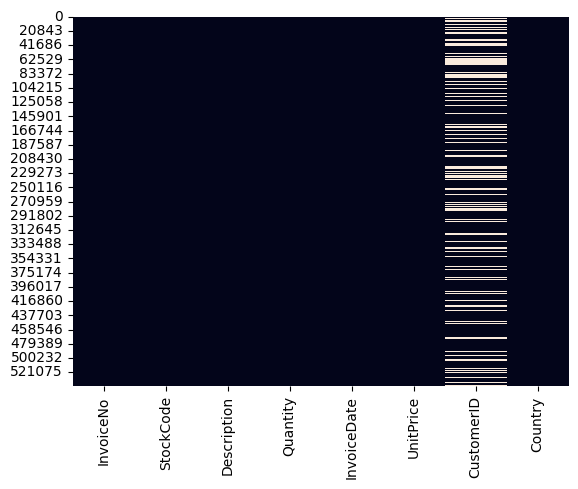

In [138]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
sns.heatmap(dataset_online_retail.isnull(), cbar=False)

### What did you know about your dataset?

1. The dataset contain 541909 rows and 8 columns. Among 8  columns, 5 column having numerical data , 2 having categorical data and 1 having datatype data.
2. There are total 136534 missing values from column Description and Customer ID column.
2. 5268 rows having duplicate data i.e. approximate 1% rows are duplicated.

## ***2. Understanding Your Variables***

In [139]:
# Dataset Columns
dataset_online_retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [140]:
# Dataset Describe
dataset_online_retail.describe(include='all')# describe will generate descriptive statistics of each column

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
count,541909.0,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900.0,4070,4223,NaN,23260,NaN,NaN,38
top,573585.0,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114.0,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


### Variables Description

1. Invoic NO:- It refers to invoice number.
2. Stock code:- It refers to stock name code.
3. Description:- It refers to description of product.
4. Quantity:- It gives the quantity bought by customer.
5. InvoiceDate:- It gives date of invoice.
6. UnitPrice:- It refers to price per unit.
7. CustomerID:- It referes to id of customer
8. Country:- It refers to location of customer.

### Check Unique Values for each variable.

In [141]:
# Check Unique Values for each variable.
for i in dataset_online_retail.columns.tolist():
  print("No. of unique values in ",i,"is",dataset_online_retail[i].nunique(),".")   #nunique gives no. of distinct elements in each column.

No. of unique values in  InvoiceNo is 25900 .
No. of unique values in  StockCode is 4070 .
No. of unique values in  Description is 4223 .
No. of unique values in  Quantity is 722 .
No. of unique values in  InvoiceDate is 23260 .
No. of unique values in  UnitPrice is 1630 .
No. of unique values in  CustomerID is 4372 .
No. of unique values in  Country is 38 .


## 3. ***Data Wrangling***

### Data Wrangling Code

#### 3.1 Removing duplicate data

In [142]:
#removing duplicate rows
dataset_online_retail=dataset_online_retail.drop_duplicates()

####3.2 Handling Missing Value

3.2.1 Handing Missing Value in Description Column.

In [143]:
# This will gives us no. of occurance of each unique value from column children.
dataset_online_retail['Description'].value_counts()

WHITE HANGING HEART T-LIGHT HOLDER     2357
REGENCY CAKESTAND 3 TIER               2189
JUMBO BAG RED RETROSPOT                2156
PARTY BUNTING                          1720
LUNCH BAG RED RETROSPOT                1625
                                       ... 
rcvd be air temp fix for dotcom sit       1
SET 12 COLOURING PENCILS DOILEY           1
SET 36 COLOURING PENCILS DOILEY           1
 I LOVE LONDON MINI RUCKSACK              1
found some more on shelf                  1
Name: Description, Length: 4223, dtype: int64

As there are 4223 type of unique description and if we will replace null value with some description then this will add noise in our original dataset so it's better to remove that rows.

3.2.2 Handing Missing Value in CustomerID Column.

In [144]:
# Write your code to make your dataset analysis ready.
# This will gives us no. of occurance of each unique value from column children.
dataset_online_retail['CustomerID'].value_counts()

17841.0    7812
14911.0    5898
14096.0    5128
12748.0    4459
14606.0    2759
           ... 
18068.0       1
13256.0       1
15590.0       1
16138.0       1
15389.0       1
Name: CustomerID, Length: 4372, dtype: int64

As customerID is unique to each customer , so If I will replace null values with one particular ID then it will create noise in my dataset, so I will remove the rows with missing customer ID.

In [145]:
dataset_online_retail.dropna(inplace=True)# dropping those rows which contain null values.

Keeping only those rows whose quantity >0

In [146]:
dataset_online_retail=dataset_online_retail[(dataset_online_retail['Quantity']>0)] # keeping those rows whose quantity column value greater than 0

In [147]:
# after deleting rows checking shape of dataframe
dataset_online_retail.shape

(392732, 8)

3.2 Changing inappropriate datatype

In [148]:
dataset_online_retail['InvoiceNo'] = dataset_online_retail['InvoiceNo'].apply(int)
dataset_online_retail['InvoiceDate'] = dataset_online_retail['InvoiceDate'].apply(pd.to_datetime)
dataset_online_retail['CustomerID'] = dataset_online_retail['CustomerID'].apply(int)

3.2 Adding New column

In [149]:
dataset_online_retail['Month'] = dataset_online_retail['InvoiceDate'].dt.strftime("%B")
dataset_online_retail['Year'] = dataset_online_retail['InvoiceDate'].dt.year
dataset_online_retail['Year'] = dataset_online_retail['Year'].apply(int)


In [150]:
dataset_online_retail['Amount'] = dataset_online_retail['Quantity']*dataset_online_retail['UnitPrice']


### What all manipulations have you done and insights you found?

**Handling missing values** :-
* I have deleted rows which having missing value in either CustomerID or Description.
* After removing missing value we have 406829 rows in dataset.

**Changed Inappropriate datatype**:-
*   InvoiceNo column data type was object so I have changed to int.

**Added New Column**
* Added new column 'Amount' which is product of quantity and price.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

## ***4.1 Univariate Analysis***

#### Chart - 1 Description

WHITE HANGING HEART T-LIGHT HOLDER    0.005133
REGENCY CAKESTAND 3 TIER              0.004364
JUMBO BAG RED RETROSPOT               0.004112
ASSORTED COLOUR BIRD ORNAMENT         0.003552
PARTY BUNTING                         0.003539
                                        ...   
GREEN WITH METAL BAG CHARM            0.000003
WHITE WITH METAL BAG CHARM            0.000003
BLUE/NAT SHELL NECKLACE W PENDANT     0.000003
PINK EASTER HENS+FLOWER               0.000003
PAPER CRAFT , LITTLE BIRDIE           0.000003
Name: Description, Length: 3877, dtype: float64
 


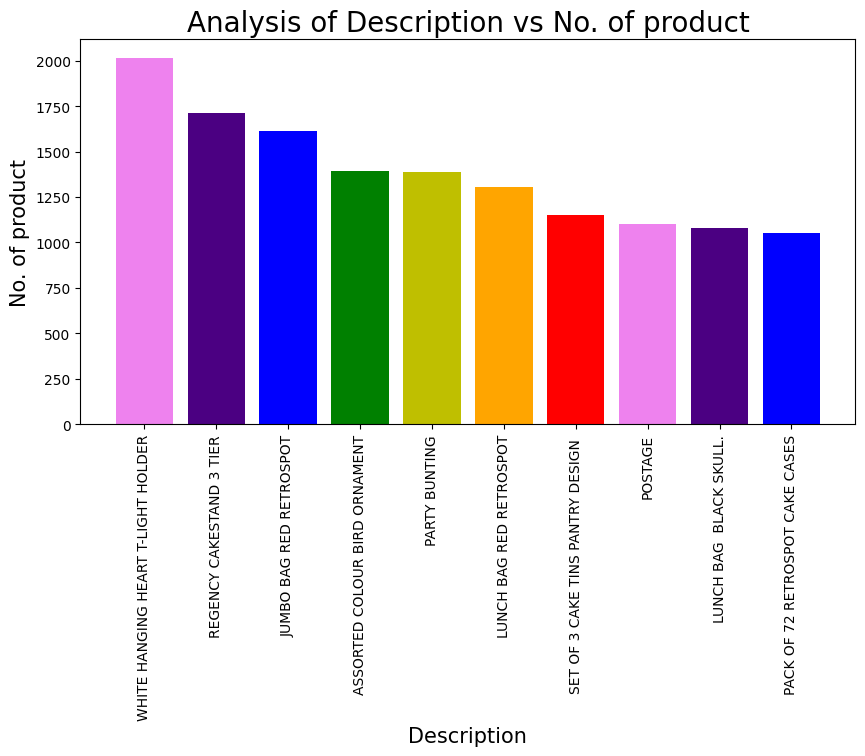

In [151]:
# Chart - 1 visualization code
print(dataset_online_retail.Description.value_counts(normalize=True)) #This will gives us no. of occurance of each unique value from Description column
print(" ")

count=dict(dataset_online_retail['Description'].value_counts())# taking unigue value as key and it's frequency as value into dictionary
dict_count_col=dict(sorted(count.items(), key=lambda x: x[1],reverse=True)) # sorting in descending order
dict_count_col=dict(more_itertools.take(10, dict_count_col.items()))   # taking only 1st 10 key
xaxis = np.arange(len(dict_count_col)) # taking xaxis value from 0 to length of unique key - 1
plt.figure(figsize=(10,5)) # setting chart/figure size
p1 = plt.bar(xaxis, list(dict_count_col.values()),color=['violet','indigo','b','g','y','orange','r']) # plotting bar chart

plt.ylabel("No. of product",fontsize = 15) # ylabel for bar chart
plt.xlabel("Description",fontsize = 15) # xlabel for bar chart
plt.title("Analysis of Description vs No. of product",fontsize = 20)# title for bar chart

plt.xticks(xaxis, list(dict_count_col.keys()),rotation=90)# to set tick location and labels of x axis.
plt.show()

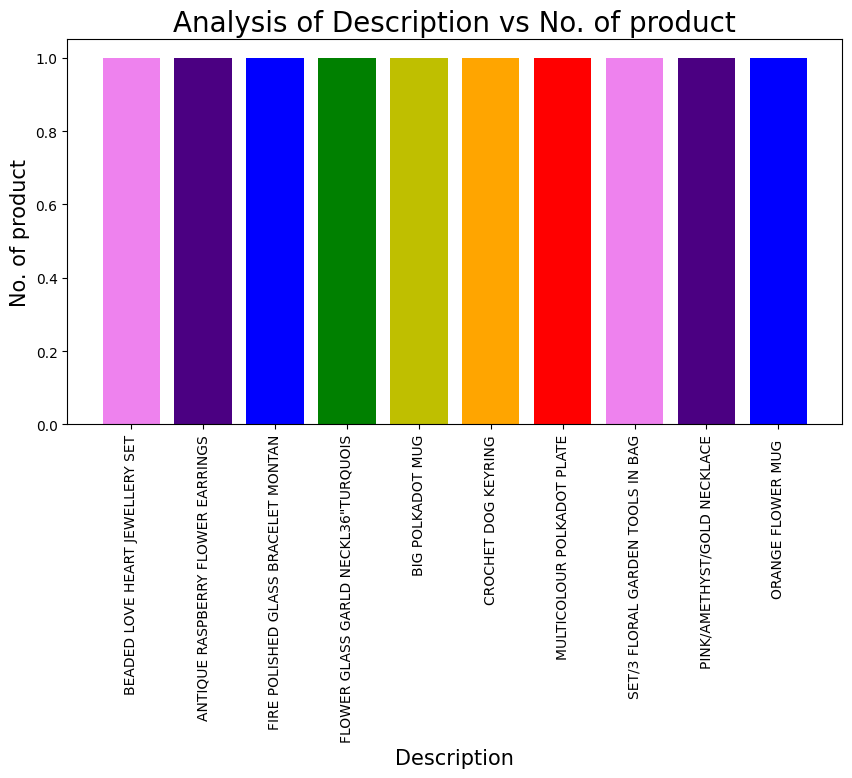

In [152]:
count=dict(dataset_online_retail['Description'].value_counts())# taking unigue value as key and it's frequency as value into dictionary
dict_count_col=dict(sorted(count.items(), key=lambda x: x[1],)) # sorting in descending order
dict_count_col=dict(more_itertools.take(10, dict_count_col.items()))   # taking only 1st 10 key
xaxis = np.arange(len(dict_count_col)) # taking xaxis value from 0 to length of unique key - 1
plt.figure(figsize=(10,5)) # setting chart/figure size
p1 = plt.bar(xaxis, list(dict_count_col.values()),color=['violet','indigo','b','g','y','orange','r']) # plotting bar chart

plt.ylabel("No. of product",fontsize = 15) # ylabel for bar chart
plt.xlabel("Description",fontsize = 15) # xlabel for bar chart
plt.title("Analysis of Description vs No. of product",fontsize = 20)# title for bar chart

plt.xticks(xaxis, list(dict_count_col.keys()),rotation=90)# to set tick location and labels of x axis.
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To show top 10 and bottom 10 description which is purchased by customer I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

1.   There are 3877 unique description found in Description Column.
2.   Around 2000 orders are for "WHITE HANGING HEART T-LIGHT HOLDER" product that means maximum order for white hanging heart t-light holder.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from the above chart we came to know which product has highest order.

#### Chart - 2 Country

United Kingdom          0.889225
Germany                 0.022985
France                  0.021203
EIRE                    0.018404
Spain                   0.006315
Netherlands             0.006017
Belgium                 0.005171
Switzerland             0.004690
Portugal                0.003700
Australia               0.003015
Norway                  0.002730
Italy                   0.001930
Channel Islands         0.001902
Finland                 0.001744
Cyprus                  0.001535
Sweden                  0.001146
Austria                 0.001013
Denmark                 0.000968
Poland                  0.000840
Japan                   0.000817
Israel                  0.000624
Unspecified             0.000614
Singapore               0.000565
Iceland                 0.000463
USA                     0.000456
Canada                  0.000384
Greece                  0.000369
Malta                   0.000285
United Arab Emirates    0.000173
European Community      0.000153
RSA       

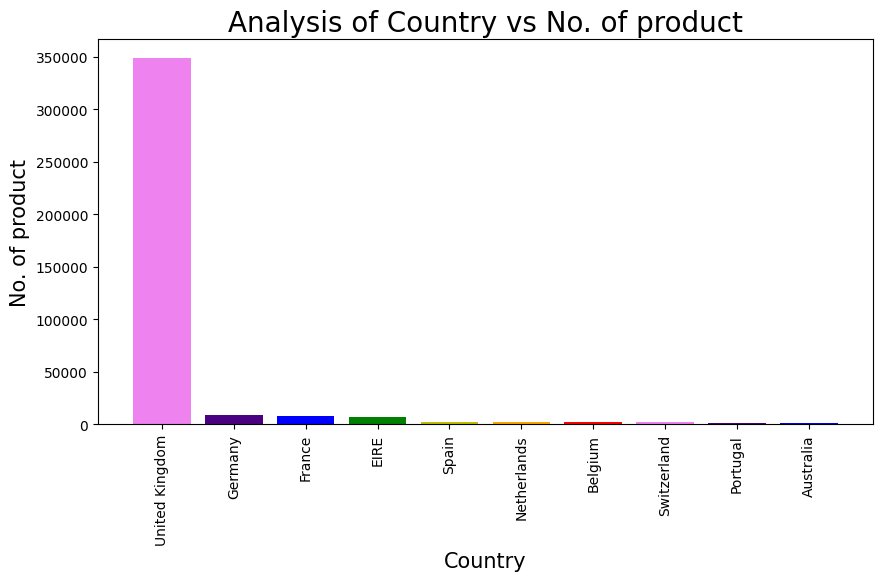

In [153]:
# Chart - 2 visualization code
print(dataset_online_retail.Country.value_counts(normalize=True)) #This will gives us no. of occurance of each unique value from country column
print(" ")

count=dict(dataset_online_retail['Country'].value_counts())# taking unigue value as key and it's frequency as value into dictionary
dict_count_col=dict(sorted(count.items(), key=lambda x: x[1],reverse=True)) # sorting in descending order
dict_count_col=dict(more_itertools.take(10, dict_count_col.items()))   # taking only 1st 10 key
xaxis = np.arange(len(dict_count_col)) # taking xaxis value from 0 to length of unique key - 1
plt.figure(figsize=(10,5)) # setting chart/figure size
p1 = plt.bar(xaxis, list(dict_count_col.values()),color=['violet','indigo','b','g','y','orange','r']) # plotting bar chart

plt.ylabel("No. of product",fontsize = 15) # ylabel for bar chart
plt.xlabel("Country",fontsize = 15) # xlabel for bar chart
plt.title("Analysis of Country vs No. of product",fontsize = 20)# title for bar chart

plt.xticks(xaxis, list(dict_count_col.keys()),rotation=90)# to set tick location and labels of x axis.
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To show top 10 country which purchased order I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

1. Maximum order Around 88%  are from United Kingdom Country. And least from Saudi Arabia Country.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

We came to know that from which country we get maximum order. United kingdom is making positive impact on business.

#### Chart - 3 Stock Code

85123A    0.005151
22423     0.004364
85099B    0.004112
84879     0.003552
47566     0.003539
            ...   
20678     0.000003
90059D    0.000003
90168     0.000003
90169     0.000003
23843     0.000003
Name: StockCode, Length: 3665, dtype: float64
 


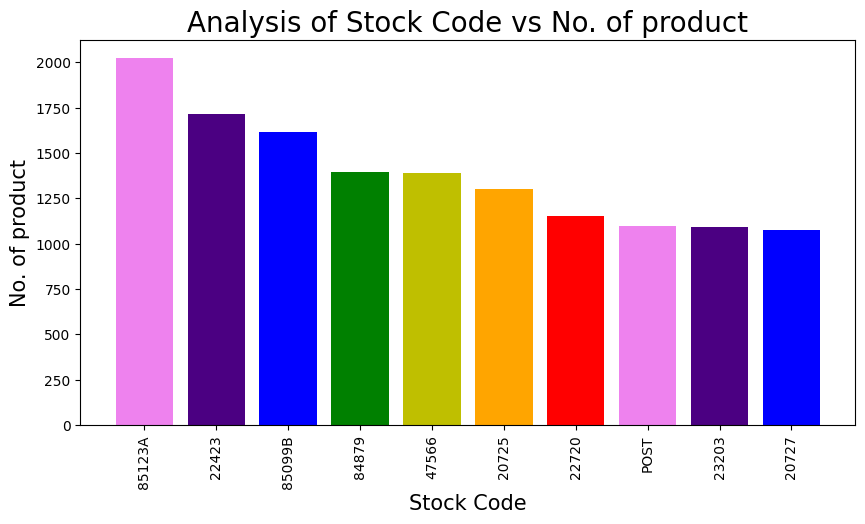

In [154]:
# Chart - 3 visualization code

print(dataset_online_retail.StockCode.value_counts(normalize=True)) #This will gives us no. of occurance of each unique value from StockCode column
print(" ")

count=dict(dataset_online_retail['StockCode'].value_counts())# taking unigue value as key and it's frequency as value into dictionary
dict_count_col=dict(sorted(count.items(), key=lambda x: x[1],reverse=True)) # sorting in descending order
dict_count_col=dict(more_itertools.take(10, dict_count_col.items()))   # taking only 1st 10 key
xaxis = np.arange(len(dict_count_col)) # taking xaxis value from 0 to length of unique key - 1
plt.figure(figsize=(10,5)) # setting chart/figure size
p1 = plt.bar(xaxis, list(dict_count_col.values()),color=['violet','indigo','b','g','y','orange','r']) # plotting bar chart

plt.ylabel("No. of product",fontsize = 15) # ylabel for bar chart
plt.xlabel("Stock Code",fontsize = 15) # xlabel for bar chart
plt.title("Analysis of Stock Code vs No. of product",fontsize = 20)# title for bar chart

plt.xticks(xaxis, list(dict_count_col.keys()),rotation=90)# to set tick location and labels of x axis.
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To show top 10 stock which purchased order I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

* 3665 unique stock code is available for this dataset. Maximum stock is for 85123A stock code.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From bar chart data  I can say 85123A stock code is making positive impact on business.

#### Chart - 4 Year

2011    367059
2010     25673
Name: Year, dtype: int64
 


<Axes: ylabel='Year'>

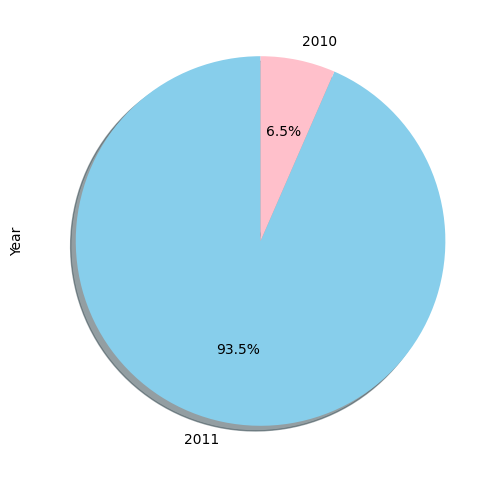

In [155]:
# Chart - 4 visualization code


print(dataset_online_retail.Year.value_counts()) #This will gives us no. of occurance of each unique value from is_repeated_guest column
print(" ")
# Dependant Variable Column Visualization
dataset_online_retail['Year'].value_counts().plot(kind='pie',
                              figsize=(15,6),
                               autopct="%1.1f%%",
                               startangle=90,
                               shadow=True,
                               colors=['skyblue','pink'],
                               explode=[0,0]
                              ) #plotting pie chart of is_repeated_guest column

##### 1. Why did you pick the specific chart?

A pie chart is graph which present the data in a circular shape. Pie means whole, and slices means part of whole. The slices of pie show the relative size of the data. A pie chart requires a list of categorical and numerical variables. Using pie chart it is easy to show the percentage comparison through area covered in a circle with different colors. That's Why I choose pie chart to show percentage of order for year.

##### 2. What is/are the insight(s) found from the chart?

* We have data for 2 year 2010 and 2011.
* In 2011 we have maximum order i.e. 93.5%  and only 6.5 orders are from 2010 year.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Year 2011 is making positive impact on business.

#### Chart - 5 Month

November     0.160878
October      0.124248
December     0.108723
September    0.101013
May          0.071486
June         0.068561
March        0.068423
August       0.068230
July         0.067685
April        0.057125
January      0.053449
February     0.050179
Name: Month, dtype: float64
 


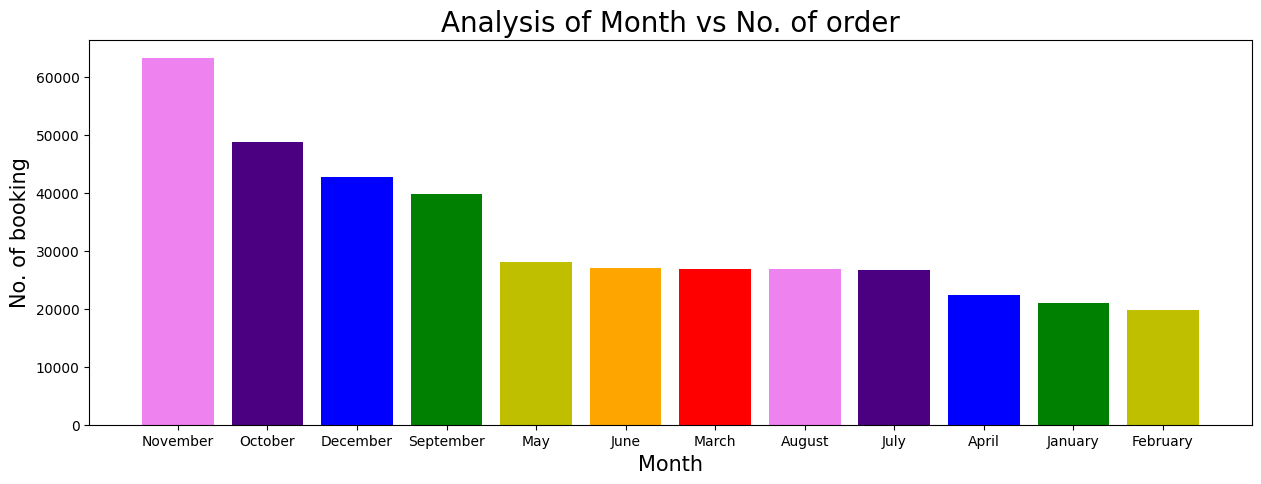

In [156]:
# Chart - 5 visualization code
print(dataset_online_retail['Month'].value_counts(normalize=True)) #This will gives us no. of occurance of each unique value from month column
print(" ")
count=dict(dataset_online_retail['Month'].value_counts())# taking unigue value as key and it's frequency as value into dictionary

xaxis = np.arange(len(count)) # taking xaxis value from 0 to length of unique key - 1
plt.figure(figsize=(15,5)) # # setting chart/figure size
p1 = plt.bar(xaxis, list(count.values()),color=['violet','indigo','b','g','y','orange','r']) #  plotting bar chart

plt.ylabel("No. of booking",fontsize = 15)# xylabel for barchart
plt.xlabel("Month",fontsize = 15) # xlabel for barchart
plt.title("Analysis of Month vs No. of order",fontsize = 20)# title for bar chart

plt.xticks(xaxis, list(count.keys()),rotation=0)# to set tick location and labels of x axis.
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To check  month  wise purchased order history I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

* In month November we get highest order around 16% of total orderand in February we get least order around 5%.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Month November is making positive impact on business.

#### Chart - 6 Customer ID

17841    0.019545
14911    0.014442
14096    0.013014
12748    0.011237
14606    0.006816
           ...   
17747    0.000003
16737    0.000003
18184    0.000003
15313    0.000003
13106    0.000003
Name: CustomerID, Length: 4339, dtype: float64
 


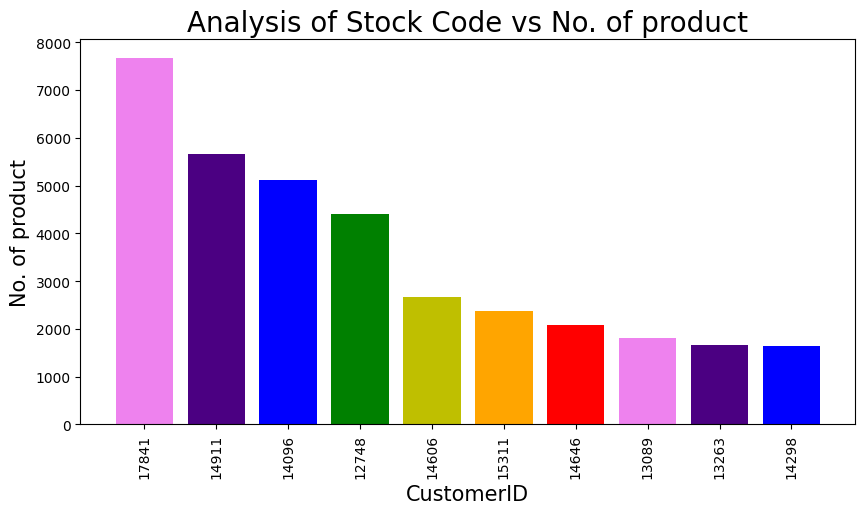

In [157]:
# Chart - 6 visualization code
print(dataset_online_retail.CustomerID.value_counts(normalize=True)) #This will gives us no. of occurance of each unique value from StockCode column
print(" ")

count=dict(dataset_online_retail['CustomerID'].value_counts())# taking unigue value as key and it's frequency as value into dictionary
dict_count_col=dict(sorted(count.items(), key=lambda x: x[1],reverse=True)) # sorting in descending order
dict_count_col=dict(more_itertools.take(10, dict_count_col.items()))   # taking only 1st 10 key
xaxis = np.arange(len(dict_count_col)) # taking xaxis value from 0 to length of unique key - 1
plt.figure(figsize=(10,5)) # setting chart/figure size
p1 = plt.bar(xaxis, list(dict_count_col.values()),color=['violet','indigo','b','g','y','orange','r']) # plotting bar chart

plt.ylabel("No. of product",fontsize = 15) # ylabel for bar chart
plt.xlabel("CustomerID",fontsize = 15) # xlabel for bar chart
plt.title("Analysis of Stock Code vs No. of product",fontsize = 20)# title for bar chart

plt.xticks(xaxis, list(dict_count_col.keys()),rotation=90)# to set tick location and labels of x axis.
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To check  which customer has more purchased order history I used bar chart

##### 2. What is/are the insight(s) found from the chart?

* There are 4339 customer purchased order.
* Customer ID 17841 has more purchased order and 13106  has less purchased order

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Customer ID 17841 is making positive impact on busines.

#### Chart - 7 Amount

In [158]:
dataset_online_retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Month', 'Year', 'Amount'],
      dtype='object')

Text(0.5, 1.0, 'Boxplot of Amount')

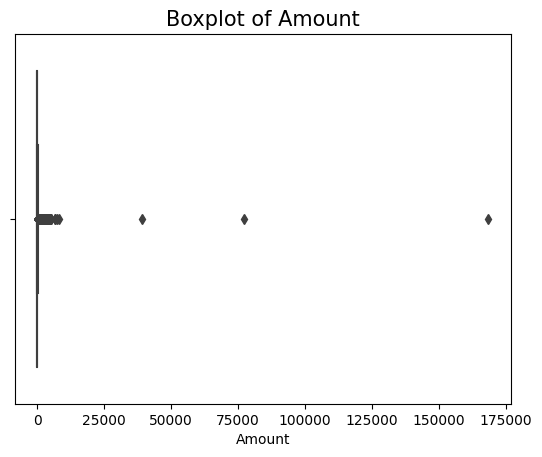

In [159]:
# Chart - 7 visualization code
#plotting histogram of "quantity" column
sns.boxplot(data=dataset_online_retail, x="Amount")
plt.title("Boxplot of Amount",fontsize = 15)# title for boxplot


##### 1. Why did you pick the specific chart?

* Box plot gives visual representation of 5 number summary. 5 number summary include minimum, maxiumum, 25th percentile,50th percentile, 75th percentile of particular numerical column. In order to see 5 number summary of Amount I used boxplot.

##### 2. What is/are the insight(s) found from the chart?

1. Maximum order is of  is 17500. Amount contain outlier.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

I can not say about impact on business from above chart.

## ***4.2 Bivariate Analysis***

#### Chart - 8 Customer ID and Total Amount

   CustomerID  Total Revenue
0       14646      280206.02
1       18102      259657.30
2       17450      194390.79
3       16446      168472.50
4       14911      143711.17
5       12415      124914.53
6       14156      117210.08
7       17511       91062.38
8       16029       80850.84
9       12346       77183.60
*************


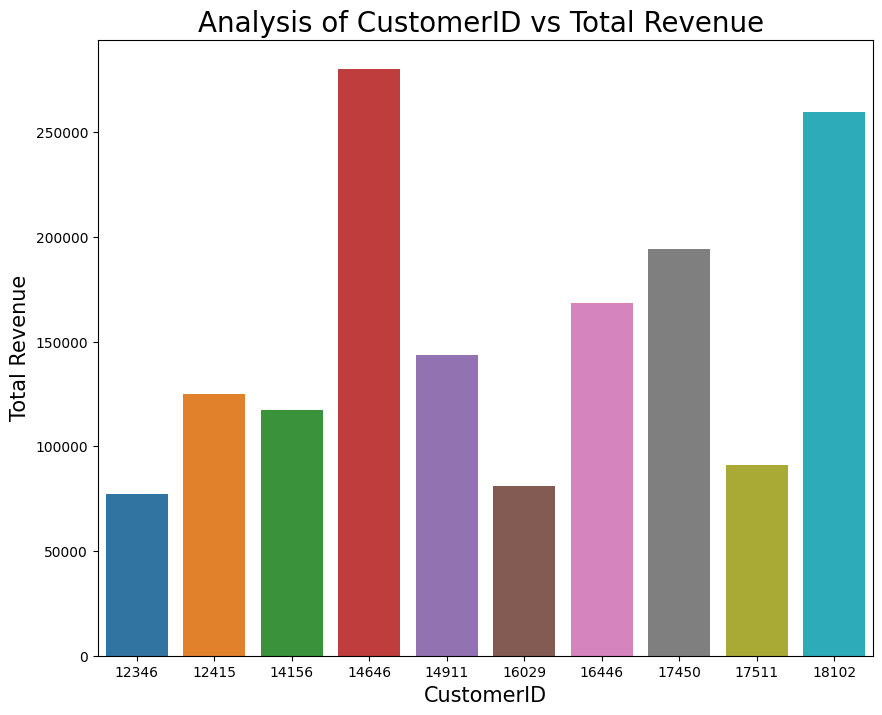

In [160]:
# Chart - 8 visualization code
most_revenue_making_cust=dataset_online_retail.groupby('CustomerID')['Amount'].sum().sort_values(ascending=False).reset_index(name="Total Revenue").head(10)
print(most_revenue_making_cust)
most_revenue_making_cust.sort_values(by=['Total Revenue'],inplace=True)
print("*************")
xaxis = np.arange(10) # taking xaxis value from 0 to length of unique key - 1

lst_cust=most_revenue_making_cust['CustomerID'].values. tolist()
# plotting bar chart of adr vs hotel
fig, ax = plt.subplots(figsize=(10, 8))# setting chart/figure size of subplot
sns.color_palette("husl", 9)
sns.barplot(data=most_revenue_making_cust, x='CustomerID',y="Total Revenue",ax=ax,) # ploting countplot of CustomerID vs Total Revenue
plt.ylabel("Total Revenue",fontsize = 15) # ylabel for bar chart
plt.xlabel("CustomerID",fontsize = 15)# xlabel for bar chart
plt.title("Analysis of CustomerID vs Total Revenue ",fontsize = 20)# title for bar chart
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally.  To show  customert ID Vs. Total amount column I use bar chart.

##### 2. What is/are the insight(s) found from the chart?

 We get maximumn revenue 280206.02 from customer ID 14646.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

customer ID 14646 is making positive impact on business, as this customer giving us more revenue.

#### Chart - 9 Country Vs Total Amount

          Country  Total Revenue
0  United Kingdom    7285024.644
1     Netherlands     285446.340
2            EIRE     265262.460
3         Germany     228678.400
4          France     208934.310
5       Australia     138453.810
6           Spain      61558.560
7     Switzerland      56443.950
8         Belgium      41196.340
9          Sweden      38367.830
*************


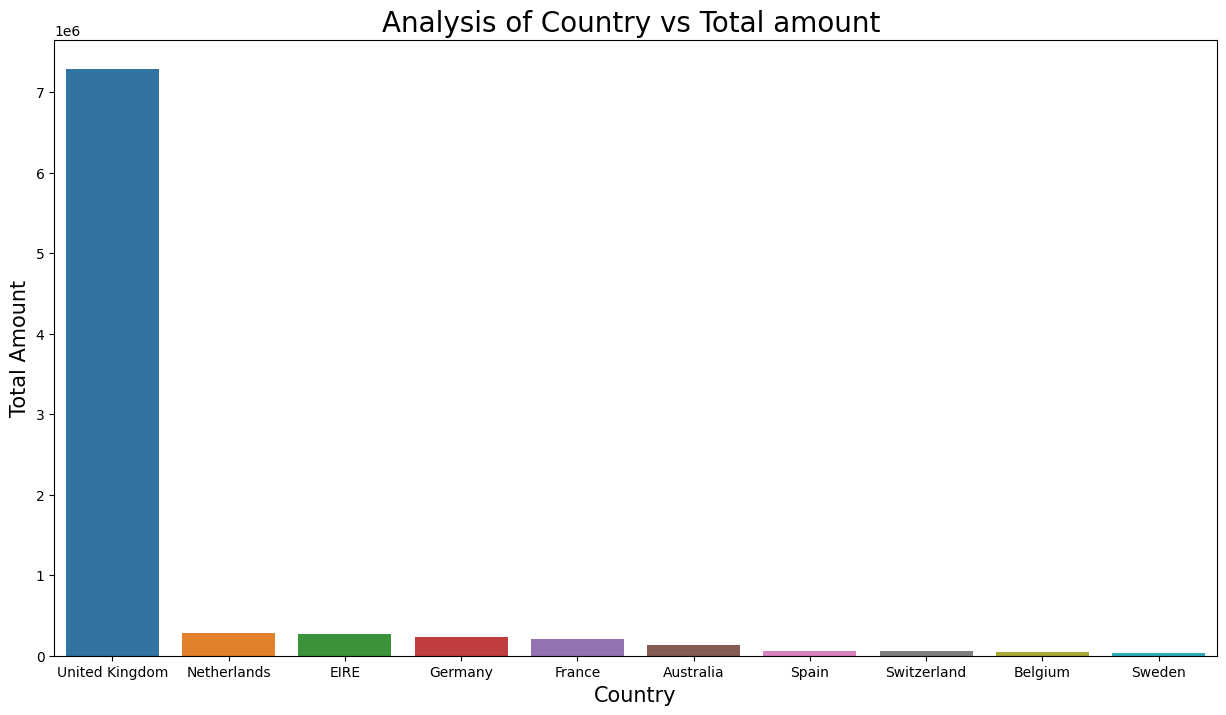

In [161]:
# Chart - 9 visualization code
most_revenue_making_country=dataset_online_retail.groupby('Country')['Amount'].sum().sort_values(ascending=False).reset_index(name="Total Revenue").head(10)
print(most_revenue_making_country)
print("*************")
xaxis = np.arange(10) # taking xaxis value from 0 to length of unique key - 1

lst_cust=most_revenue_making_country['Country'].values. tolist()
# plotting bar chart of Country Vs Total Amount
fig, ax = plt.subplots(figsize=(15, 8))# setting chart/figure size of subplot
sns.color_palette("husl", 9)
sns.barplot(data=most_revenue_making_country, x='Country',y="Total Revenue",ax=ax,) # ploting countplot of country vs total revenue
plt.ylabel("Total Amount",fontsize = 15) # ylabel for bar chart
plt.xlabel("Country",fontsize = 15)# xlabel for bar chart
plt.title("Analysis of Country vs Total amount ",fontsize = 20)# title for bar chart
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To show  country Vs. total amount column I use bar chart.

##### 2. What is/are the insight(s) found from the chart?

Maximum revenue 7285024.644 is from United Kingdom  country.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Country United kingdom is making positive impact on business.

#### Chart - 10 Description Vs Quantity

                          Description  Total Quantity
0         PAPER CRAFT , LITTLE BIRDIE           80995
1      MEDIUM CERAMIC TOP STORAGE JAR           77916
2   WORLD WAR 2 GLIDERS ASSTD DESIGNS           54319
3             JUMBO BAG RED RETROSPOT           46078
4  WHITE HANGING HEART T-LIGHT HOLDER           36706
5       ASSORTED COLOUR BIRD ORNAMENT           35263
6     PACK OF 72 RETROSPOT CAKE CASES           33670
7                      POPCORN HOLDER           30919
8                  RABBIT NIGHT LIGHT           27153
9             MINI PAINT SET VINTAGE            26076
*************


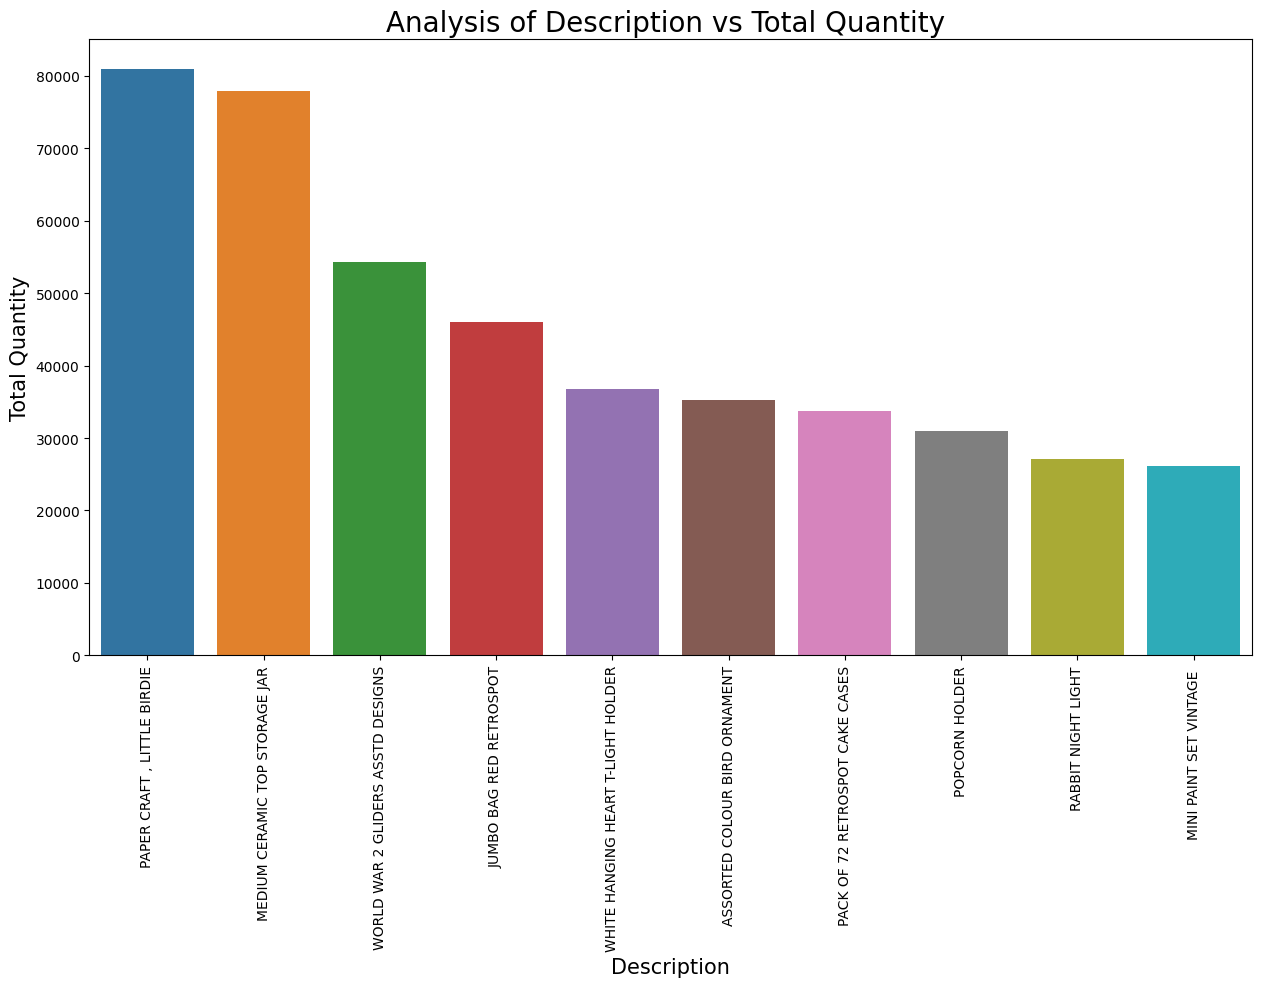

In [162]:
# Chart - 9 visualization code
most_quantity_description=dataset_online_retail.groupby('Description')['Quantity'].sum().sort_values(ascending=False).reset_index(name="Total Quantity").head(10)
print(most_quantity_description)
print("*************")
xaxis = np.arange(10) # taking xaxis value from 0 to length of unique key - 1

lst_cust=most_quantity_description['Description'].values. tolist()
xaxis = np.arange(len(lst_cust)) # taking xaxis value from 0 to length of unique key - 1
# plotting bar chart of Country Vs Total Amount
fig, ax = plt.subplots(figsize=(15, 8))# setting chart/figure size of subplot
sns.color_palette("husl", 9)
sns.barplot(data=most_quantity_description, x='Description',y="Total Quantity",ax=ax,) # ploting countplot of country vs total revenue
plt.ylabel("Total Quantity",fontsize = 15) # ylabel for bar chart
plt.xlabel("Description",fontsize = 15)# xlabel for bar chart
plt.title("Analysis of Description vs Total Quantity ",fontsize = 20)# title for bar chart
plt.xticks(xaxis, lst_cust,rotation=90)# to set tick location and labels of x axis.
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To show top 10 description ordered quntitywise I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

By looking at bar chart I came to know that " PAPER CRAFT , LITTLE BIRDIE" product ordered maximum quantity of 80995.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

PAPER CRAFT , LITTLE BIRDIE is giving positive impact on business.

In [163]:
dataset_online_retail.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country', 'Month', 'Year', 'Amount'],
      dtype='object')

#### Chart - 11 CustomerID Vs invoice No.

   CustomerID  InvoiceNo
0       17841       7676
1       14911       5672
2       14096       5111
3       12748       4413
4       14606       2677
5       15311       2366
6       14646       2080
7       13089       1814
8       13263       1667
9       14298       1637
*************


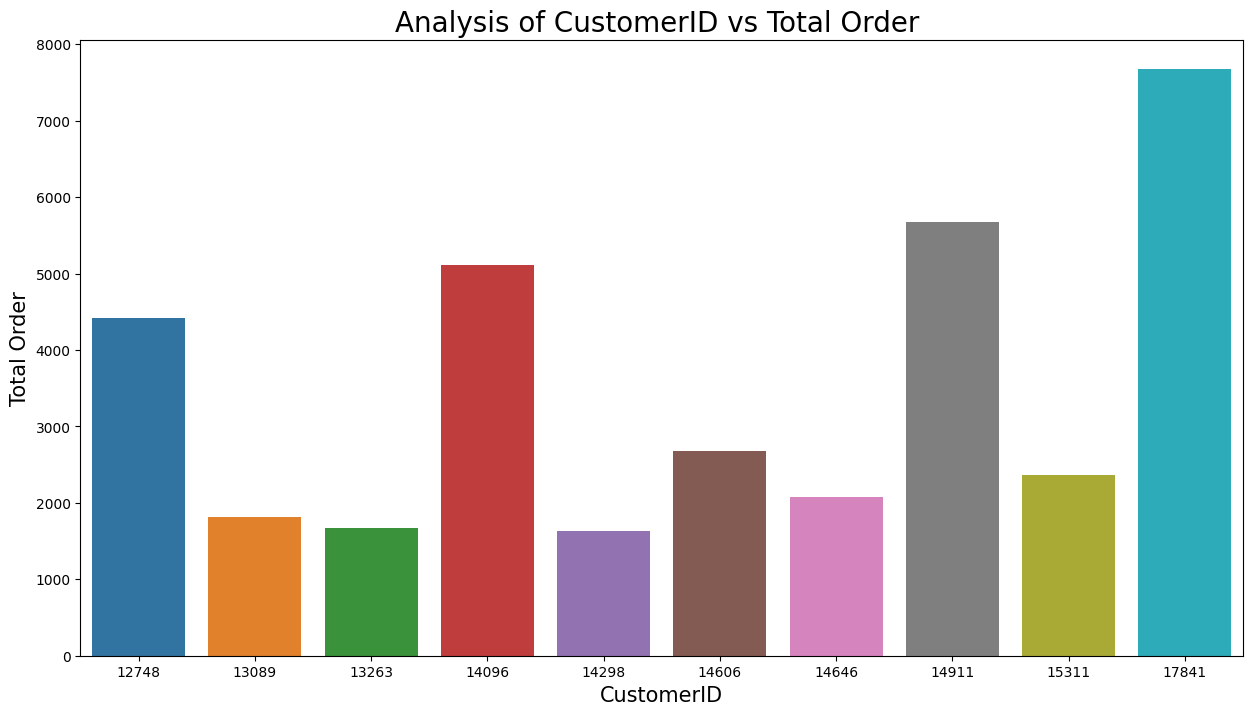

In [183]:
# Chart - 11 visualization code
df_grp_max_order = dataset_online_retail.groupby(['CustomerID']).agg({'InvoiceNo':'count'}).sort_values(['InvoiceNo'],ascending=False).reset_index().head(10)
print(df_grp_max_order)
print("*************")
xaxis = np.arange(10) # taking xaxis value from 0 to length of unique key - 1


lst_cust=df_grp_max_order['CustomerID'].values. tolist()
xaxis = np.arange(len(lst_cust)) # taking xaxis value from 0 to length of unique key - 1
# plotting bar chart of Country Vs Total Amount
fig, ax = plt.subplots(figsize=(15, 8))# setting chart/figure size of subplot
sns.color_palette("husl", 9)
sns.barplot(data=df_grp_max_order, x='CustomerID',y="InvoiceNo",ax=ax) # ploting countplot of country vs total revenue
plt.ylabel("Total Order",fontsize = 15) # ylabel for bar chart
plt.xlabel("CustomerID",fontsize = 15)# xlabel for bar chart
plt.title("Analysis of CustomerID vs Total Order ",fontsize = 20)# title for bar chart
#plt.xticks(xaxis, lst_cust,rotation=90)# to set tick location and labels of x axis.
plt.show()

##### 1. Why did you pick the specific chart?

A bar chart is graph represents categorical data with rectangular bars with heights or lengths proportional to the values that present. The bars can be plotted vertically or horizontally. To show top 10 customer orderwise I used bar chart.

##### 2. What is/are the insight(s) found from the chart?

Maximum orders are from customerId 17841.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

CustomerId 17841 is making positive impact on business.

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

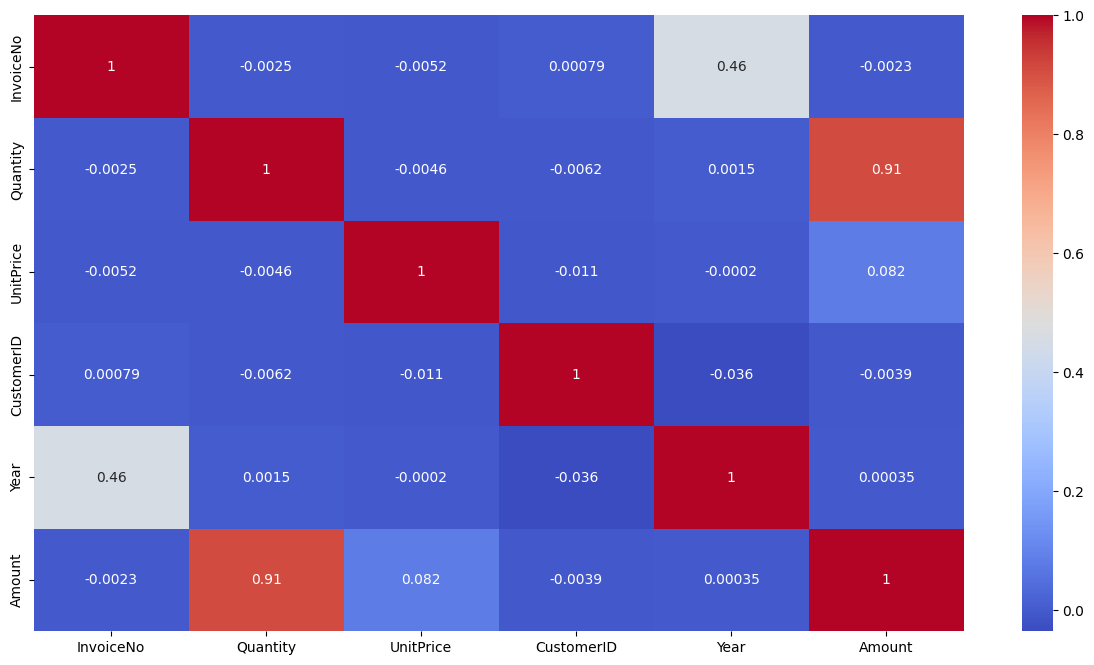

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize = (15, 8))
sns.heatmap(dataset_online_retail.corr(), annot = True, cmap = "coolwarm")
plt.show()

##### 1. Why did you pick the specific chart?

A correlation matrix is a square matrix showing the correlation coefficients between two variables.The strength and direction of the relationship between two variables in a straight line are determined by the correlation coefficient. In multivariate analysis and statistics, a correlation matrix is typically used to explore the relationships between several variables

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

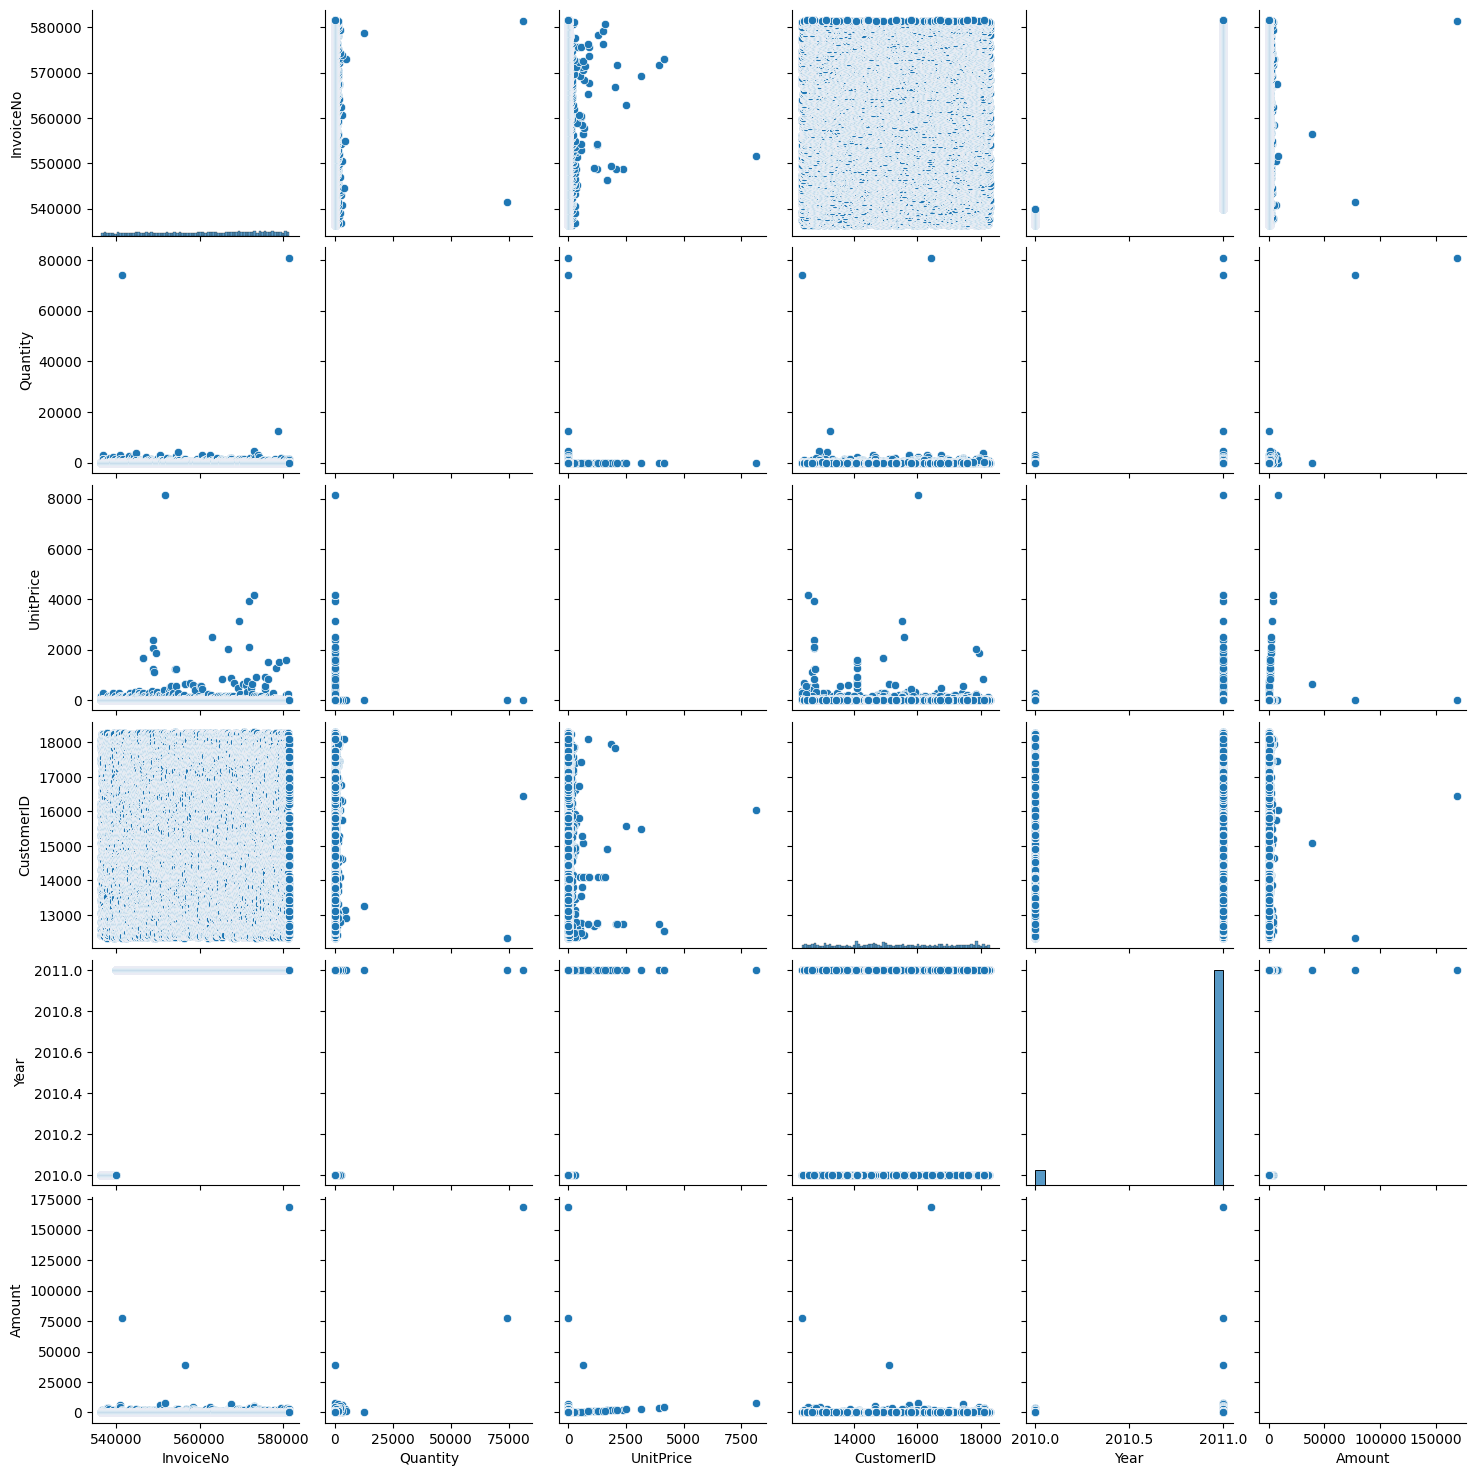

In [ ]:
# Pair Plot visualization code
sns.pairplot(dataset_online_retail)

##### 1. Why did you pick the specific chart?

Pair plots are used to determine the best combination of features to describe a connection between two variables. Additionally, it is beneficial to create some straightforward classification models by making linear separations in our data or drawing some simple lines.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

**3.3 RFM Analysis**


RFM analysis is a technique used in marketing,by grouping clients according totheir behavior. The abbreviation "RFM" stands for three significant elements:

Recency (R): Recency informs us of the most recent date of a customer's purchase. It gauges a customer's level of involvement with a brand. Customers who have recently made purchases are thought to be more active and more likely to react favorably to marketing initiatives.

Frequency (F): Frequency tells how frequently a customer makes purchases over a specific time period. It gauges the degree of client involvement and activity. Customers that make more regular purchases are viewed as loyal and may be the focus of certain marketing activities.

Monetary Value (M): Monetary Value  describes the entire sum of money a client spends over a certain period of time.Customers that make larger purchases are valued more highly and may be given additional incentives to encourage them to make additional purchases.


3.3.1 Recency

In [ ]:
df=dataset_online_retail.copy() # Take copy of origininal datset
max_date=max(df['InvoiceDate'])
df["Recency"]= (max_date - df['InvoiceDate']).dt.days

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Month,Year,Amount,Recency
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,December,2010,15.30,373
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,December,2010,20.34,373
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,December,2010,22.00,373
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,December,2010,20.34,373
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,December,2010,20.34,373
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680,France,December,2011,10.20,0
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680,France,December,2011,12.60,0
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680,France,December,2011,16.60,0
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680,France,December,2011,16.60,0


In [ ]:
grp_recency=(df.groupby('CustomerID')['Recency'].min()).reset_index()

In [ ]:
grp_recency

,CustomerID,Recency
0,12346,325
1,12347,1
2,12348,74
3,12349,18
4,12350,309
...,...,...
4334,18280,277
4335,18281,180
4336,18282,7
4337,18283,3


3.3.2 Frequency

In [ ]:
grp_frequency=(df.groupby('CustomerID')['InvoiceNo'].count()).reset_index()
grp_frequency = grp_frequency.rename(columns={'InvoiceNo': 'Frequency'})
grp_frequency

,CustomerID,Frequency
0,12346,1
1,12347,182
2,12348,31
3,12349,73
4,12350,17
...,...,...
4334,18280,10
4335,18281,7
4336,18282,12
4337,18283,721


3.3.3 Monetary

In [ ]:

grp_monetary=(df.groupby('CustomerID')['Amount'].sum()).reset_index()
grp_monetary = grp_monetary.rename(columns={'Amount': 'Total_amount'})
grp_monetary

,CustomerID,Total_amount
0,12346,77183.60
1,12347,4310.00
2,12348,1797.24
3,12349,1757.55
4,12350,334.40
...,...,...
4334,18280,180.60
4335,18281,80.82
4336,18282,178.05
4337,18283,2045.53


In [ ]:
df_RFM = pd.merge(pd.merge(grp_recency,grp_frequency,on='CustomerID'),grp_monetary,on='CustomerID')
df_RFM

,CustomerID,Recency,Frequency,Total_amount
0,12346,325,1,77183.60
1,12347,1,182,4310.00
2,12348,74,31,1797.24
3,12349,18,73,1757.55
4,12350,309,17,334.40
...,...,...,...,...
4334,18280,277,10,180.60
4335,18281,180,7,80.82
4336,18282,7,12,178.05
4337,18283,3,721,2045.53


In [ ]:
df_RFM['R'] = df_RFM['Recency'].rank(ascending=False)
df_RFM['F'] = df_RFM['Frequency'].rank(ascending=True)
df_RFM['M'] = df_RFM['Total_amount'].rank(ascending=True)

# normalizing the rank of the customers
df_RFM['R_norm'] = (df_RFM['R']/df_RFM['R'].max())*100
df_RFM['F_norm'] = (df_RFM['F']/df_RFM['F'].max())*100
df_RFM['M_norm'] = (df_RFM['M']/df_RFM['M'].max())*100

df_RFM.drop(columns=['R', 'F', 'M'], inplace=True)

df_RFM

,CustomerID,Recency,Frequency,Total_amount,R_norm,F_norm,M_norm
0,12346,325,1,77183.60,3.750291,0.841208,99.792579
1,12347,1,182,4310.00,97.915211,88.234616,92.302374
2,12348,74,31,1797.24,38.504542,42.359991,76.884075
3,12349,18,73,1757.55,74.120662,67.100714,76.353999
4,12350,309,17,334.40,5.369206,24.959668,28.647154
...,...,...,...,...,...,...,...
4334,18280,277,10,180.60,8.222688,14.346624,13.182761
4335,18281,180,7,80.82,20.020964,9.380041,2.419912
4336,18282,7,12,178.05,88.411367,17.722978,12.721825
4337,18283,3,721,2045.53,93.547636,99.297073,79.880157


### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***